# Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier   

# other libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE   
from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score  
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score,auc, roc_auc_score, accuracy_score, precision_recall_curve, roc_curve, average_precision_score, classification_report   


# 1. The imformation from data

In [34]:
df = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.1 To see if there exists missing value

In [35]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 1.2 Describe the data

In [36]:
print("Fraudulent")
print(df.Amount[df.Class == 1].describe())
print()
print("Non-Fradulent")
print(df.Amount[df.Class == 0].describe())

Fraudulent
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fradulent
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## 1.3 See the possible relationship between the default amount /time and the class label

### 1.3.1 The relationship with default time

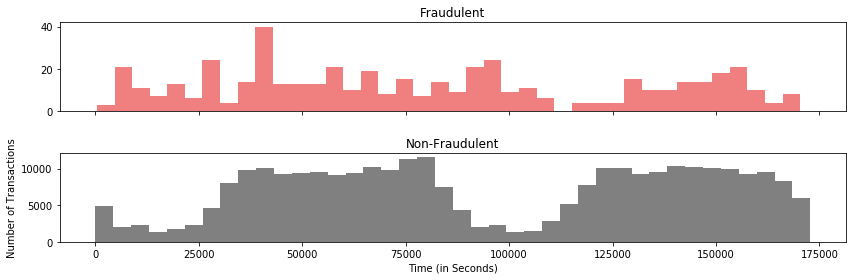

In [37]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex= True, figsize = [12,4])

ax1.hist(df.Time[df.Class == 1], bins = 40, color='lightcoral')
ax1.set_title("Fraudulent")
ax2.hist(df.Time[df.Class == 0], bins = 40, color='gray')
ax2.set_title("Non-Fraudulent")

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.tight_layout(h_pad=2)
plt.show()


### 1.3.2 The relationship with default amount

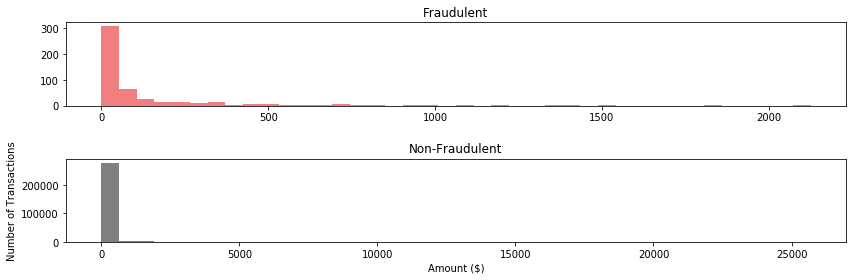

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = [12,4])

ax1.hist(df.Amount[df.Class == 1], bins = 40, color='lightcoral')
ax1.set_title("Fraudulent")
ax2.hist(df.Amount[df.Class == 0], bins = 40, color='gray')
ax2.set_title("Non-Fraudulent")


plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.tight_layout(h_pad=2)
plt.show()


#### 【Remark】   From this figure, we can find that fraudulent happened with small amount of transactions frequently. The smaller the amount is, the higher frequency of fraudulent. 

### 1.3.3 Scaling the data

#### To eliminate the infulence of different variables' scale, we will standardize the data now.

In [39]:
# Variable 'Amount' transform into 'normAmount'
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

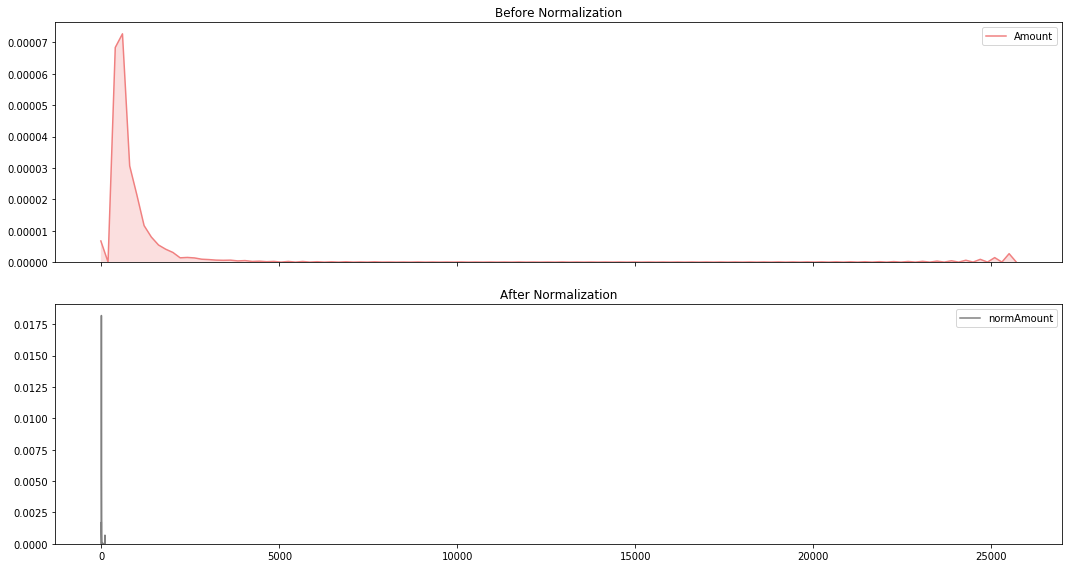

In [40]:
# visulize the change of normalization
f, (ax1, ax2) = plt.subplots(2,1,sharex= True,figsize =( 15, 8))

sns.kdeplot(df['Amount'],shade=True, ax = ax1, color='lightcoral')
ax1.set_title('Before Normalization')

sns.kdeplot(df['normAmount'],shade=True, ax = ax2, color='gray')
ax2.set_title('After Normalization')

plt.tight_layout(h_pad=2)
plt.show()

### 1.3.4 Drop useless variables: 'Time' and 'Amount'


In [41]:
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 1.4 Look into the distribution of two classes

In [42]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color='lightblue')
plt.title("Fraud class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

#### 【Remark】 The above figure shows that the orignial data is highly imbalanced. So we need to do some resampleing method to handle this problem.

# 2. Data processing
#### We tried both undersampling and oversampling(SMOTE) method to deal with imbalanced data.

## 2.1 Split the data
### 2.1.1 We use 20% of the data do the testing.

#### Do the spliting because we want to test the models on the original data set. So we split them first and do over-sampling on the train data set.

In [43]:
def data_prepration(x): 
    x_features= x.loc[:,x.columns != "Class"]
    x_labels=x.loc[:,x.columns=="Class"]           
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

data_train_X,data_test_X,data_train_y,data_test_y = data_prepration(df)
print(pd.value_counts(data_train_y['Class' ]))
print(pd.value_counts(data_test_y['Class']))

length of training data
227845
length of test data
56962
0    227462
1       383
Name: Class, dtype: int64
0    56853
1      109
Name: Class, dtype: int64


### 2.1.2 Save the splited data

In [44]:
traindata=pd.concat([data_train_X,data_train_y],axis=1)
testdata=pd.concat([data_test_X,data_test_y],axis=1)

# save original train&test data as csv file
traindata.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/train.csv',sep=',')
testdata.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/test.csv',sep=',')

## 2.2 Use the SMOTE (oversampling)

In [15]:
sm = SMOTE(random_state=0) 
sm_data_X,sm_data_y=sm.fit_sample(data_train_X.values,data_train_y.values.ravel())

### 2.2.1 Check the data after sampling

In [16]:
# check the total length
columns = data_train_X.columns
sm_data_X = pd.DataFrame(data=sm_data_X,columns=columns )
sm_data_y= pd.DataFrame(data=sm_data_y,columns=["Class"])
print(len(sm_data_X))

454890


In [17]:
print("Length of oversampled data is:",len(sm_data_X))
print("Number of normal transcation:",len(sm_data_y[sm_data_y["Class"]==0]))
print("Number of fraud transcation:",len(sm_data_y[sm_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is:",len(sm_data_y[sm_data_y["Class"]==0])/len(sm_data_X))
print("Proportion of fraud data in oversampled data is:",len(sm_data_y[sm_data_y["Class"]==1])/len(sm_data_X))

Length of oversampled data is: 454890
Number of normal transcation: 227445
Number of fraud transcation: 227445
Proportion of Normal data in oversampled data is: 0.5
Proportion of fraud data in oversampled data is: 0.5


#### The above numbers show that the data is balaced after resampling.

### 2.2.2 Load the processed trainning data into csv file

In [18]:
sm_train_data=pd.concat([sm_data_X,sm_data_y],axis=1)
sm_train_data.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_train.csv',sep=',')

sm_train_df = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/SMOTE_train.csv")

### 2.2.3 Visulization of oversampled data

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


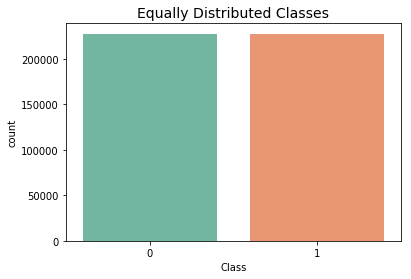

In [19]:
print('Distribution of the Classes in the subsample dataset')
print(sm_train_df['Class'].value_counts()/len(sm_train_df))

sns.countplot('Class', data=sm_train_df,palette="Set2")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## 2.3 Use Undersampling

In [81]:
df_train0 = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/train.csv")

# Shuffle the train data before do undersampling
df_shuffle = df_train.sample(frac=1)

# define the fraud number in train data(i.e. counts the number of 'Class'=0)
c0 = pd.value_counts(data_train_y['Class' ])[1]
print(c0)  # print out the fraud number in train data set

383


#### ⚠️ We can not directly use 492 now. Because number 492 is the fraud number in total original data set. But now we are doing undersampling on the train data set, which is alredy splited. So we use c0 instead, which is an variable with the eaxct fraud value in train set.

In [82]:
fraud_df = df_train.loc[df_shuffle['Class'] == 1]
norm_df = df_train.loc[df_shuffle['Class'] == 0][:c0]   

normal_distributed_df = pd.concat([fraud_df, norm_df])

In [83]:
# Shuffle the dataframe
us_train_data = normal_distributed_df.sample(frac=1, random_state=42)

# save as csv file
us_train_data.to_csv('/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/Undersample_train.csv',sep=',')

us_train_df = pd.read_csv("/Users/zhuxiaoxi/Desktop/module 5⃣️/ML/project/数据/Undersample_train.csv")

### 2.2.3 Visulization of undersampled data

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


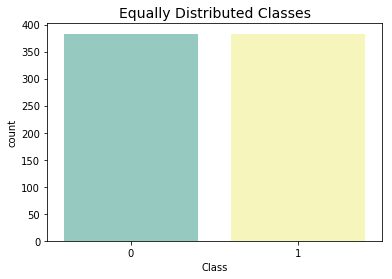

In [52]:
print('Distribution of the Classes in the subsample dataset')
print(us_train_df['Class'].value_counts()/len(us_train_df))

sns.countplot('Class', data=us_train_df,palette="Set3")
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# 3. Parameter choosing

### In this part, we used four models we learned in the class, which are also widely used in classification cases. That is, Logistic regression, KNN, SVM and Decision tree.
### As for the train data, we did oversampling and undersampling before. In systematic studies it was observed that random undersampling tends to outperform SMOTE in most situations. So in our project we also use those data processed with undersampling method to do the following things.

In [112]:
# use the balanced data after 
new_X = us_train_df.drop('Class', axis=1)
new_y = us_train_df['Class']

In [113]:
new_X.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,45,0.957665,-1.257098,-0.940844,-0.308523,1.185251,3.888488,-0.932058,0.885020,-0.758106,...,-0.005041,-0.308329,-0.889346,-0.192801,0.972470,0.530962,-0.342376,0.034631,0.063368,0.498963
1,276,1.833309,-0.139582,-2.072965,1.263953,0.847090,-0.404475,0.782795,-0.360820,0.112977,...,0.035087,0.095619,0.217188,-0.139593,0.295206,0.514232,-0.510186,-0.039569,-0.036832,0.175278
2,209986,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,...,0.804101,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,-0.350151
3,188,-1.056041,0.734998,2.542701,2.281252,1.200423,0.712579,0.428459,0.187687,-0.936579,...,-0.080189,0.095179,0.236491,-0.504771,-0.835099,0.672044,0.093189,-0.158481,-0.161272,-0.321445
4,204114,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,...,0.988493,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,0.726254


In [114]:
# the dataframe create unnamed column with no use, then delete
new_X = new_X.drop('Unnamed: 0', 1)

In [115]:
new_X0.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,0.957665,-1.257098,-0.940844,-0.308523,1.185251,3.888488,-0.932058,0.885020,-0.758106,0.714251,...,-0.005041,-0.308329,-0.889346,-0.192801,0.972470,0.530962,-0.342376,0.034631,0.063368,0.498963
1,1.833309,-0.139582,-2.072965,1.263953,0.847090,-0.404475,0.782795,-0.360820,0.112977,0.175587,...,0.035087,0.095619,0.217188,-0.139593,0.295206,0.514232,-0.510186,-0.039569,-0.036832,0.175278
2,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,-5.258096,...,0.804101,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,-0.350151
3,-1.056041,0.734998,2.542701,2.281252,1.200423,0.712579,0.428459,0.187687,-0.936579,0.473018,...,-0.080189,0.095179,0.236491,-0.504771,-0.835099,0.672044,0.093189,-0.158481,-0.161272,-0.321445
4,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,-3.393553,...,0.988493,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,0.726254


In [116]:
X_train = new_X.values
X_test = data_test_X.values
y_train = new_y.values.ravel()
y_test = data_test_y.values

## 3.1 Logistic Regression

In [30]:
log_regl = LogisticRegression()

### 3.1.1 Use grid search to find the best (hyper)parameter

In [80]:
log_reg1_param = {'penalty' : ['l1','l2'], 'C' : [0.01, 0.1, 1, 10, 100]}

gridCV_log_regl = GridSearchCV(log_regl, log_reg1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_log_regl.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished
D:\sw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sw\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

### 3.1.2 Logistic regreesion best estimator:

In [32]:
log_reg1_best_parameters = gridCV_log_regl.best_params_
print('The best parameters for using Logistic Regression is', log_reg1_best_parameters)

The best parameters for using Logistic Regression is {'C': 0.1, 'penalty': 'l1'}


## 3.2 KNN

In [33]:
knears1 = KNeighborsClassifier()

### 3.2.1 Use grid search to find the best (hyper)parameter

#### As for the range of KNN's k, because 1-NN always gives 100% train accuracy, so we excluded it out. And this is a binary case, we thought it's better to not use an even number like 2, then we exluded 2-NN out too. 
#### The range starts from 3.

In [37]:
knears1_param = {'n_neighbors': list(range(3, 31)), 'algorithm': ['auto','ball_tree','kd_tree','brute']}

gridCV_knearsl = GridSearchCV(knears1, knears1_param , scoring = 'f1', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_knearsl.fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    9.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

### 3.2.2 KNN best estimator:

In [38]:
knears1_best_parameters = gridCV_knearsl.best_params_
print('The best parameters for using KNN is', knears1_best_parameters)

The best parameters for using KNN is {'algorithm': 'auto', 'n_neighbors': 3}


## 3.3 Support Vector Machine

In [39]:
svc1 = SVC()

### 3.3.1 Use grid search to find the best (hyper)parameter

In [42]:
svc1_param = {'C': [0.3, 0.5, 0.7, 0.9, 1, 3], 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}

gridCV_svcl = GridSearchCV(svc1, svc1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_svcl.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.8s finished
D:\sw\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.3, 0.5, 0.7, 0.9, 1, 3], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

### 3.3.2 SVC best estimator:

In [43]:
svc1_best_parameters = gridCV_svcl.best_params_
print('The best parameters for using Surpport Vector Classifier is', svc1_best_parameters)

The best parameters for using Surpport Vector Classifier is {'C': 0.3, 'kernel': 'rbf'}


## 3.4 Decision tree

In [46]:
tree1 = DecisionTreeClassifier()

### 3.4.1 Use grid search to find the best (hyper)parameter

In [53]:
tree1_param = {'criterion':['gini', 'entropy'], 'max_depth': list(range(2,7)), 'min_samples_leaf': list(range(5, 10))}

gridCV_tree1 = GridSearchCV(tree1, tree1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_tree1.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

### 3.4.2 Decision tree best estimator:

In [55]:
tree1_best_parameters = gridCV_tree1.best_params_
print('The best parameters for using Decision tree Classifier is', tree1_best_parameters)

The best parameters for using Decision tree Classifier is {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


## 3.5 Random Forest

### 3.5.1 Use grid search to find the best (hyper)parameter

In [64]:
rf1 = RandomForestClassifier()

In [66]:
rf1_param = {'n_estimators': [100, 200, 500], 'max_features': [2, 3], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

gridCV_rf1 = GridSearchCV(rf1, rf1_param, scoring = 'recall', cv = 10, refit = True, verbose = 1, n_jobs = -1)
gridCV_rf1.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'max_features': [2, 3], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

### 3.5.2 Random forest best estimator:

In [72]:
rf1_best_parameters = gridCV_rf1.best_params_
print("The best parameters for using this model is",rf1_best_parameters)

The best parameters for using this model is {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# 4. Improvement of parameter choosing

#### In the above processes, we under(over)sampled before doing cross-validation, which means we use the information of whole data,  and the spliting into validation set & train set is after using these infos. However, the information from validation set should not used at taht time. So we need to do under(over)smpling during the validation.

####  It makes no sense to create instances based on our current minority class and then exclude an instance for validation, pretending we didn’t generate it using data that is still in the training set.

In [110]:
def pr_auc_score(clf, x, y):
    precisions, recalls, _ = precision_recall_curve(y, clf.predict_proba(x)[:,1], pos_label=1)
    
    return auc(recalls, precisions)

In [111]:
# define the cross validation score of a classifier when face a imblanced case
def imb_cv_score(clf, x, y, cv, score, sampler): 
    cv_score = 0.
    train_score = 0.
    test_score = 0.
    # we will use stratified K-fold method
    skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=False)
    
    for train_idx, test_idx in skf.split(x, y):
        x_fold_train, y_fold_train = sampler.fit_sample(x[train_idx], y[train_idx])   
        # "sampler" we will use later is a resampling way, like under(over)sampling
       
        clf.fit(x_fold_train, y_fold_train)  # "clf": this variable is the classifier fit the data
        
        train_score = score(clf, x_fold_train, y_fold_train)  # "score": this variable is the scoring criterion
        test_score = score(clf, x[test_idx], y[test_idx])
        
        cv_score = test_score + cv_score    # aggregate the test_score of each test fold
        
        return cv_score/cv  # compute the average test_score

## Do the parameter choosing via an imporved way

In [ ]:
log_reg2 = LogisticRegression()
def score_log_reg2(clf, x, y):
    return imb_cv_score(clf, x, y, cv=5, score=pr_auc_score, sampler=SMOTE())

# use the original train data(just after spliting and without any processing)
x = data_train_X.values
y = data_train_y.values.ravel()

log_reg2_param = {'penalty' : ['l1','l2'], 'C' : [0.01, 0.1, 1, 10, 100]}

In [ ]:
gridCV_log_reg2 = GridSearchCV(log_reg2, log_reg2_param, scoring = score_log_reg2, cv = 5, refit = True, verbose = 1, n_jobs = -1)
gridCV_log_reg2.fit(x, y)

In [117]:
log_reg2_best_parameters = gridCV_log_reg2.best_params_
print('The best parameters for using Logistic Regression is', log_reg2_best_parameters)

The best parameters for using Logistic Regression is {'C': 0.1, 'penalty': 'l1'}


# 5.Define metrics

## 5.1 Confusion matrix

### Define the plot_confusion_matrix function

In [127]:
import itertools 

# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [174]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 5.1.1 Give the Recall metric under different thereshold

In [175]:
y_pred_undersample_proba = lr.predict_proba(X_test)

In [176]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(data_test_y,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.97247706422
Recall metric in the testing dataset:  0.935779816514
Recall metric in the testing dataset:  0.871559633028
Recall metric in the testing dataset:  0.825688073394
Recall metric in the testing dataset:  0.761467889908
Recall metric in the testing dataset:  0.559633027523


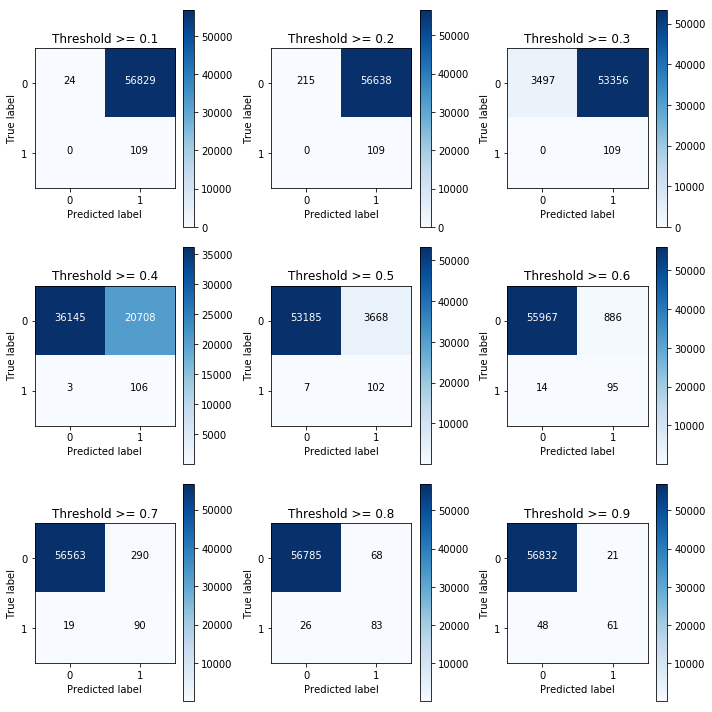

In [177]:
plt.show()

## 5.2 Precision-recall curve

In [178]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(data_test_y,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

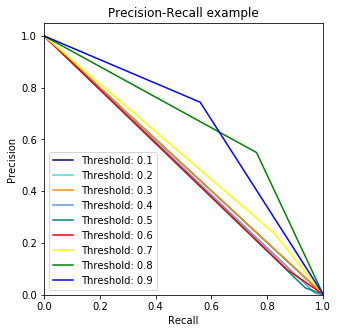

In [179]:
plt.show()